<a href="https://colab.research.google.com/github/emmanueltiti/week-8-emmanuel-s-ip/blob/main/week_8_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 8 IP

## 1. Defining the Question

### a) Specifying the Question

The aim of this study is to come up with algorithim models that can predict if a patient has hyperthyroid given his test results.The model should give predictions with the highest accuracy.

### b) Defining the Metric for Success

On the models created ,the acccuracy of the models is our main concern.We shall use that as our metric for determining which models are appropriate for this task.

### c) Understanding the context 

Hyperthyroidism (overactive thyroid) occurs when your thyroid gland produces too much of the hormone thyroxine. Hyperthyroidism can accelerate your body's metabolism, causing unintentional weight loss and a rapid or irregular heartbeat.The data give entails medical test that are perfomed to determine thyroxine hormone in a patient.These records if modelled properly may be used to predict if patients are hyperthyroid or not.

### d) Recording the Experimental Design

We shall clean the data and sort out the outliers and model our data using random forest technique ,Ada boost and SVM.We shall use the accuracy score of each created model to determine which is best suited for the task.

### e) Data Relevance


The data contains all required variables ,the dependent-status and the independent variables.It is complete and should give great results.



## 2. Reading the Data

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor


In [4]:
# Loading the Dataset
# Dataset url = http://bit.ly/hypothyroid_data
data=pd.read_csv('http://bit.ly/hypothyroid_data')


## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
#
data.shape

(3163, 26)

In [6]:
# Previewing the top of our dataset
#
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [7]:
(data['TSH'] == '?').sum()

468

In [8]:
data1=data.replace(to_replace ="?",
                 value =np.nan)
data1

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN


In [9]:
data1.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [10]:
# Checking whether each column has an appropriate datatype
data1.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [11]:
#changing the data types of our numerical values
data2=data1[['TSH', 'T3', 'TT4', 'T4U' ,'FTI','TBG', 'age']].astype('float64')
data2.dtypes


TSH    float64
T3     float64
TT4    float64
T4U    float64
FTI    float64
TBG    float64
age    float64
dtype: object

Feature Engineering

Here we change out categorical data into numerics for our models.

In [12]:
df=data1.drop(data1[['TSH', 'T3', 'TT4', 'T4U' ,'FTI', 'TBG','age']],axis=1)

In [13]:
df2=pd.get_dummies(df)
df2

,status_hypothyroid,status_negative,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3159,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3160,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3161,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [14]:
#joining our numerical values and the newly encoded dataframe of categorical data
final=pd.concat([data2,df2],axis=1)
final1=final.drop('status_negative', axis=1)

## 5. Tidying the Dataset

In [15]:
final1.fillna(final1.mean(), inplace = True)

In [16]:
final1.isnull().sum()

TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
TBG                            0
age                            0
status_hypothyroid             0
sex_F                          0
sex_M                          0
on_thyroxine_f                 0
on_thyroxine_t                 0
query_on_thyroxine_f           0
query_on_thyroxine_t           0
on_antithyroid_medication_f    0
on_antithyroid_medication_t    0
thyroid_surgery_f              0
thyroid_surgery_t              0
query_hypothyroid_f            0
query_hypothyroid_t            0
query_hyperthyroid_f           0
query_hyperthyroid_t           0
pregnant_f                     0
pregnant_t                     0
sick_f                         0
sick_t                         0
tumor_f                        0
tumor_t                        0
lithium_f                      0
lithium_t                      0
goitre_f  

Outliers

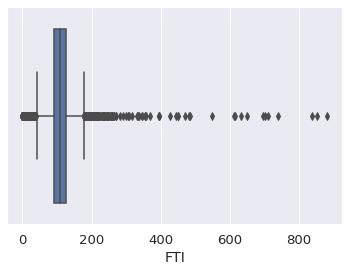

In [17]:
#ax=sns.boxplot(x=final1['TSH'])
ax=sns.boxplot(x=final1['FTI'])


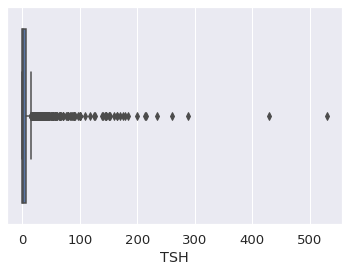

In [18]:
ax=sns.boxplot(x=final1['TSH'])

We can choose to trop values above 180 mark

In [19]:
df_final=final1.drop(final1[final1['FTI']>180].index)
df_final1=df_final.drop(final1[final1['TSH']>180].index)
df_final1.max()

TSH                            178.00
T3                               8.90
TT4                            396.00
T4U                              2.21
FTI                            180.00
TBG                            122.00
age                             98.00
status_hypothyroid               1.00
sex_F                            1.00
sex_M                            1.00
on_thyroxine_f                   1.00
on_thyroxine_t                   1.00
query_on_thyroxine_f             1.00
query_on_thyroxine_t             1.00
on_antithyroid_medication_f      1.00
on_antithyroid_medication_t      1.00
thyroid_surgery_f                1.00
thyroid_surgery_t                1.00
query_hypothyroid_f              1.00
query_hypothyroid_t              1.00
query_hyperthyroid_f             1.00
query_hyperthyroid_t             1.00
pregnant_f                       1.00
pregnant_t                       1.00
sick_f                           1.00
sick_t                           1.00
tumor_f     

## 6. Exploratory Analysis

In [20]:
final1.corr()

,TSH,T3,TT4,T4U,FTI,TBG,age,status_hypothyroid,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
TSH,1.000000e+00,-1.716474e-01,-3.095646e-01,6.899334e-02,-2.441455e-01,-1.377684e-03,-0.007429,0.582010,0.035000,-0.034517,0.003148,-0.003148,1.495940e-02,-1.495940e-02,0.001494,-0.001494,-0.011183,0.011183,-0.066286,0.066286,0.024922,-0.024922,0.013932,-0.013932,0.007624,-0.007624,0.019547,-0.019547,1.566004e-03,-1.566004e-03,0.015887,-0.015887,-1.435490e-16,9.334184e-17,-5.131072e-03,5.131072e-03,-3.152630e-04,3.152630e-04,-3.158438e-04,3.158438e-04,-3.164283e-04,3.164283e-04,-4.622833e-03,4.622833e-03
T3,-1.716474e-01,1.000000e+00,5.453309e-01,3.880427e-01,2.939119e-01,1.966333e-02,-0.268648,-0.186543,0.060028,-0.077393,-0.018801,0.018801,1.514719e-02,-1.514719e-02,-0.063089,0.063089,0.008659,-0.008659,0.042905,-0.042905,-0.188833,0.188833,-0.201306,0.201306,0.100294,-0.100294,-0.025094,0.025094,-1.457993e-02,1.457993e-02,-0.087650,0.087650,4.324908e-02,-4.324908e-02,-2.761805e-16,3.460261e-16,-9.865257e-04,9.865257e-04,-9.883431e-04,9.883431e-04,-9.901719e-04,9.901719e-04,1.567418e-03,-1.567418e-03
TT4,-3.095646e-01,5.453309e-01,1.000000e+00,3.228259e-01,6.848721e-01,2.568318e-02,-0.091175,-0.376579,0.150104,-0.172770,-0.214168,0.214168,2.009985e-02,-2.009985e-02,0.002968,-0.002968,0.017646,-0.017646,0.014915,-0.014915,-0.150607,0.150607,-0.165402,0.165402,0.041733,-0.041733,0.014603,-0.014603,2.218557e-03,-2.218557e-03,-0.040543,0.040543,2.007243e-02,-2.007243e-02,6.782828e-02,-6.782828e-02,6.198695e-18,1.906786e-16,1.883376e-17,4.313337e-16,6.137692e-17,4.210433e-16,-3.598077e-03,3.598077e-03
T4U,6.899334e-02,3.880427e-01,3.228259e-01,1.000000e+00,-2.832527e-01,2.647094e-02,-0.194656,0.081150,0.257829,-0.199584,-0.071925,0.071925,3.459826e-02,-3.459826e-02,-0.025797,0.025797,-0.024006,0.024006,-0.035266,0.035266,-0.071976,0.071976,-0.324259,0.324259,0.047898,-0.047898,-0.024048,0.024048,-3.837642e-02,3.837642e-02,-0.069716,0.069716,-9.384068e-03,9.384068e-03,2.291519e-02,-2.291519e-02,9.813771e-04,-9.813771e-04,-2.531259e-15,2.330245e-15,-2.550413e-15,2.351793e-15,-5.945843e-03,5.945843e-03
FTI,-2.441455e-01,2.939119e-01,6.848721e-01,-2.832527e-01,1.000000e+00,8.822400e-04,0.015460,-0.316258,-0.047811,-0.077641,-0.113521,0.113521,4.386403e-03,-4.386403e-03,0.017410,-0.017410,0.026322,-0.026322,0.046753,-0.046753,-0.077633,0.077633,0.007124,-0.007124,0.023051,-0.023051,0.026445,-0.026445,1.691905e-02,-1.691905e-02,0.000158,-0.000158,3.662561e-02,-3.662561e-02,4.891703e-02,-4.891703e-02,-1.498077e-03,1.498077e-03,-9.843027e-04,9.843027e-04,1.151331e-16,3.491091e-16,1.953986e-03,-1.953986e-03
TBG,-1.377684e-03,1.966333e-02,2.568318e-02,2.647094e-02,8.822400e-04,1.000000e+00,-0.045748,-0.001038,0.032449,-0.038969,0.010097,-0.010097,4.407643e-17,-6.068482e-17,0.011681,-0.011681,0.019331,-0.019331,0.012246,-0.012246,-0.002340,0.002340,-0.084974,0.084974,-0.003020,0.003020,0.001174,-0.001174,7.733017e-17,5.077106e-17,0.011297,-0.011297,-9.320629e-03,9.320629e-03,-7.992498e-03,7.992498e-03,1.574900e-03,-1.574900e-03,1.577801e-03,-1.577801e-03,1.580721e-03,-1.580721e-03,-1.530198e-16,1.006139e-16
age,-7.429077e-03,-2.686477e-01,-9.117529e-02,-1.946565e-01,1.546035e-02,-4.574793e-02,1.000000,0.035415,-0.001927,0.008913,0.001492,-0.001492,1.976348e-02,-1.976348e-02,0.058943,-0.058943,0.012284,-0.012284,-0.048322,0.048322,0.087881,-0.087881,0.159354,-0.159354,-0.064631,0.064631,0.063094,-0.063094,2.132011e-02,-2.132011e-02,0.037187,-0.037187,-2.014359e-01,2.014359e-01,-

## 7. Implementing the Solution

**PART 1**

**Random Forest**


In [21]:
y=final1['status_hypothyroid'].values
test_features = final1.columns.to_list()
test_features.remove('status_hypothyroid')
X = final1[test_features].values
#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Fitting model

In [74]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 95)
forest = forest.fit(X_train, y_train)


In [75]:
#using the model to make predictions
y_pred = forest.predict(X_test)
y_pred




array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08421053,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.98947368,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.98947368, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.91578947, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01052632, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
#model performance
from sklearn import metrics

forest.score(X_test,y_test)

0.6858791919068927

Our model has 67% accuracy which is not that great.Lets use Ada boost and see if there is significant diffrence.italicized text

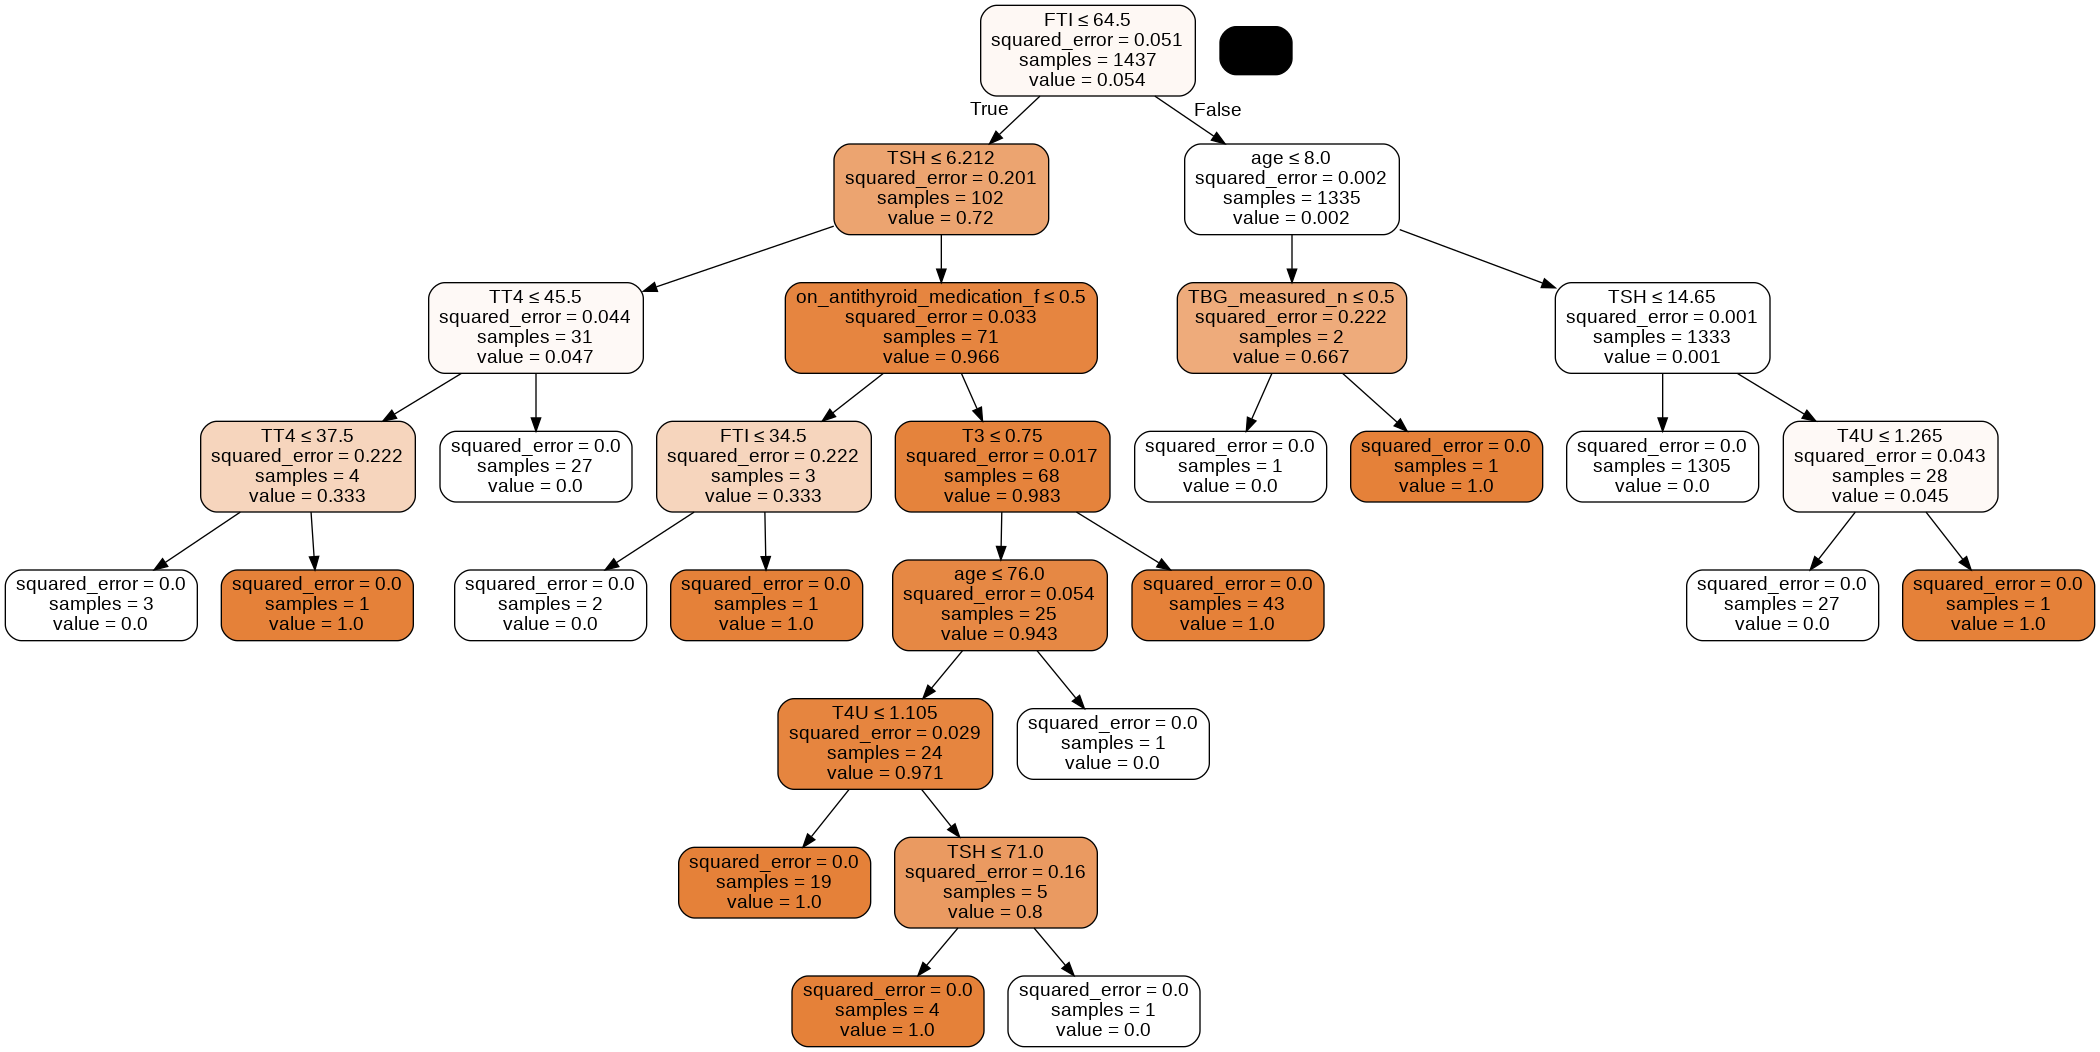

In [25]:
#a visualization on our model 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())



Feature Importance

In [26]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('TSH', 0.24), ('T3', 0.0), ('TT4', 0.02), ('T4U', 0.02), ('FTI', 0.69), ('TBG', 0.0), ('age', 0.02), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.01), ('on_antithyroid_medication_t', 0.0), ('thyroid_surgery_f', 0.0), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_n', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_n', 0.0), ('T3_measured_y', 0.0), ('TT4_measured_n', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_n', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_n', 0.0), ('FTI_measured_y', 0.0), ('TBG_measured_n', 0.01), ('TBG_measured_y', 0.0)]

Variable

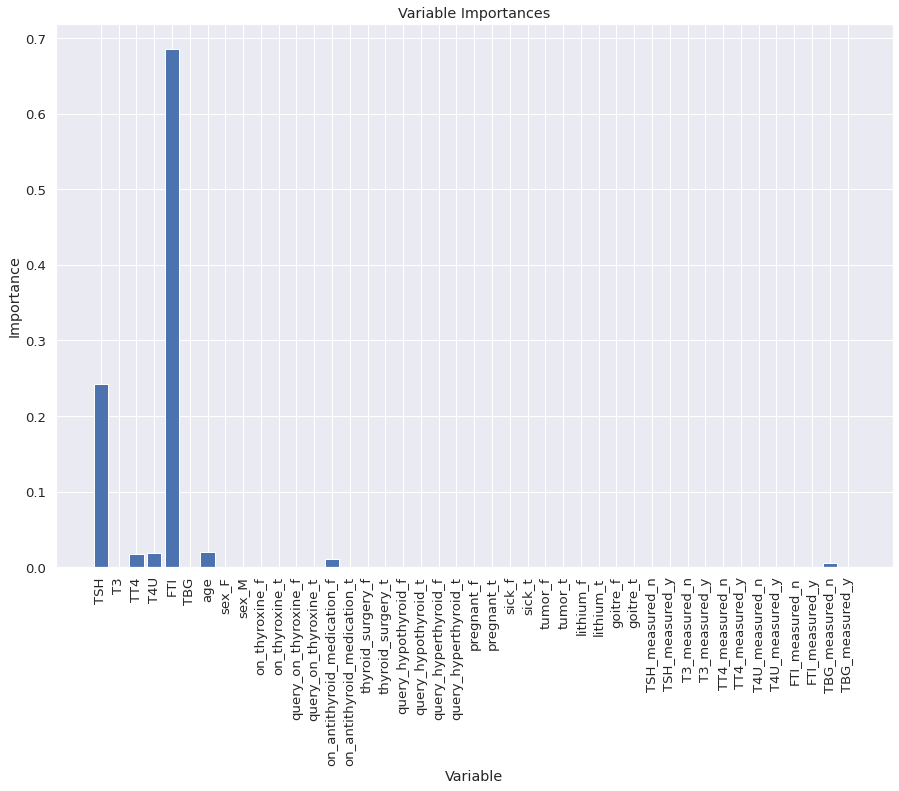

In [27]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The garph above shows the variables the contribute largely in our model making predictions.

**Adaboost**

Lets compare the perfomance of this model and the random forest model

In [72]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                          n_estimators=95, random_state=0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)


In [73]:
#ACCURACY PERFOMANC
#
ada_boost.score(X_test,y_test)

0.7038400755232872

Ada boost has an accuracy score of 70% meaning it predicts slightly better then random forest.In this case random forest is the best modelling technique.
the estimator for ada boost performs best at 95 so does that of random forest.

**PART 2**

SVM

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 14400x7560 with 0 Axes>

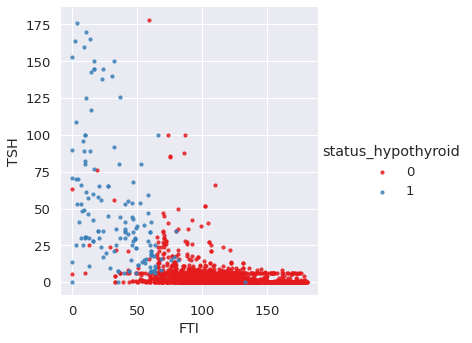

In [39]:
# Plotting our desired features
fig = plt.gcf()
fig.set_size_inches(200, 105)

sns.lmplot('FTI','TSH', data=df_final1,hue='status_hypothyroid',palette='Set1', fit_reg=False, scatter_kws={"s": 10})

In [40]:
# Specify the input for the model
determinants =df_final1[['FTI','TSH']].values
status_label =df_final1['status_hypothyroid'].values
print(status_label)

# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(determinants,status_label)
clf_model.score(determinants,status_label)


[1 1 1 ... 0 0 0]


0.9794681925277684

In [41]:
model = SVC(kernel= 'rbf')
clf_model = model.fit(determinants,status_label)
clf_model.score(determinants,status_label)


0.9838438236284079

In [42]:
model = SVC(kernel= 'poly')
clf_model = model.fit(determinants,status_label)
clf_model.score(determinants,status_label)


0.979131605520027

Of the three kernels the rbf performs better and is hence the besty model overally for the task.

## 8. Challenging the solution

Ada boost generaly performs poorly compared to svm.






In [87]:
# Reviewing the Solution 
#
print(ada_boost.score(X_test,y_test))
clf_model.score(determinants,status_label)

0.7038400755232872


0.979131605520027

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

The data had enough variables to create an accurate model


### c). Did we have the right question?

Our problem question was well solved and an almot 100% acurate model was developed